### First, import the needed libraries

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### import the data set

In [44]:
df = pd.read_csv('./HeartFailure.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


### Understand the dataset, view its shape and get some statistics about it

In [45]:
df.shape

(299, 13)

In [46]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


### Check if there are any missing data in any column

In [47]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

## Get the correlation between dataset attributes

### Q1- What's the Correlation between different attributes?
### from below matrix we can see positive correlation between sex and smoking and negative correlation between time and Death events

(12.9, 0.09999999999999998)

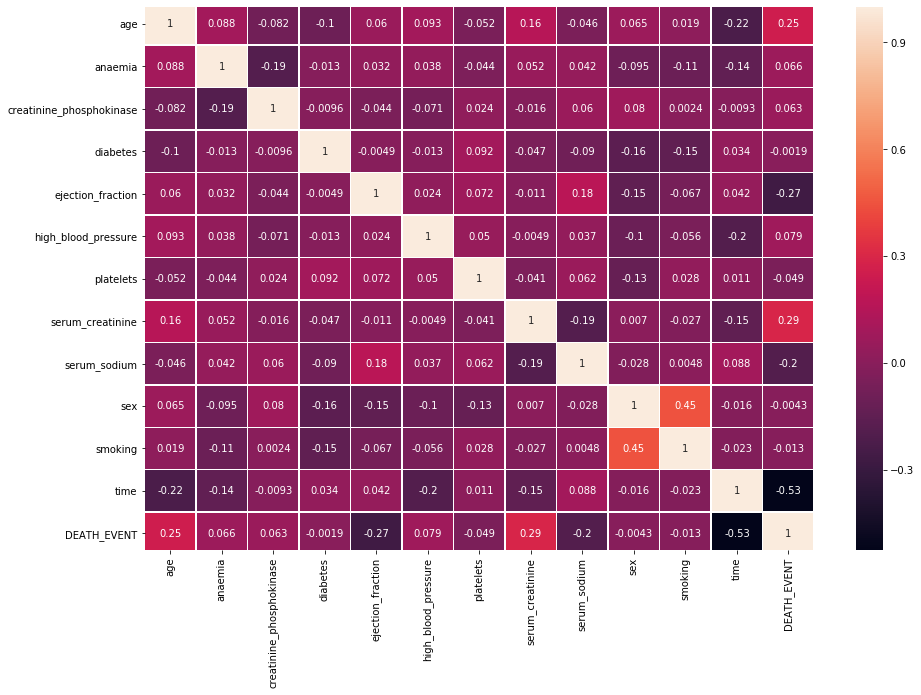

In [48]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, linewidth=0.5, ax=ax)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.4, top - 0.4)

### Q2 - What is the percentage of smokers for each gender?
### we can notice that males has higher smokers percentage than femails and that's matching the high positive correlation between sex and smoking

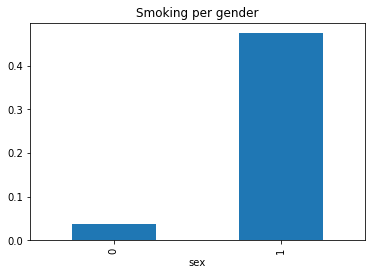

In [49]:
df.groupby(['sex']).mean()['smoking'].plot(kind="bar");
plt.title("Smoking per gender");

### Q3- Can the follow up times effect the death events?
 ### We can notice that the higher the times of follow up the lower the death events and  that's match ing the high negative correlation between Time and Death_Events

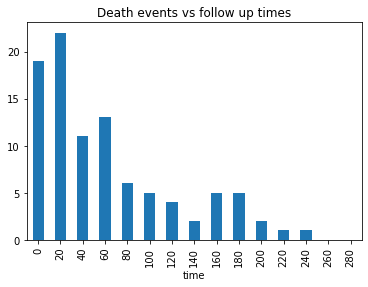

In [50]:
df.groupby(((df['time']/20).astype('int32')*20)).sum()['DEATH_EVENT'].plot(kind="bar");
plt.title("Death events vs follow up times");